In [1]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#this one have more performance
# import the necessary packages
import numpy as np
import cv2
from imutils.object_detection import non_max_suppression
import imutils
from imutils import paths
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cv2.startWindowThread()

image = cv2.imread("1660654800.jpg")

#image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(2, 2),
  padding=(4, 4), scale=1.05)
# draw the original bounding boxes
for (x, y, w, h) in rects:
  cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
  cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

cv2.imwrite("frame.png",image)




True

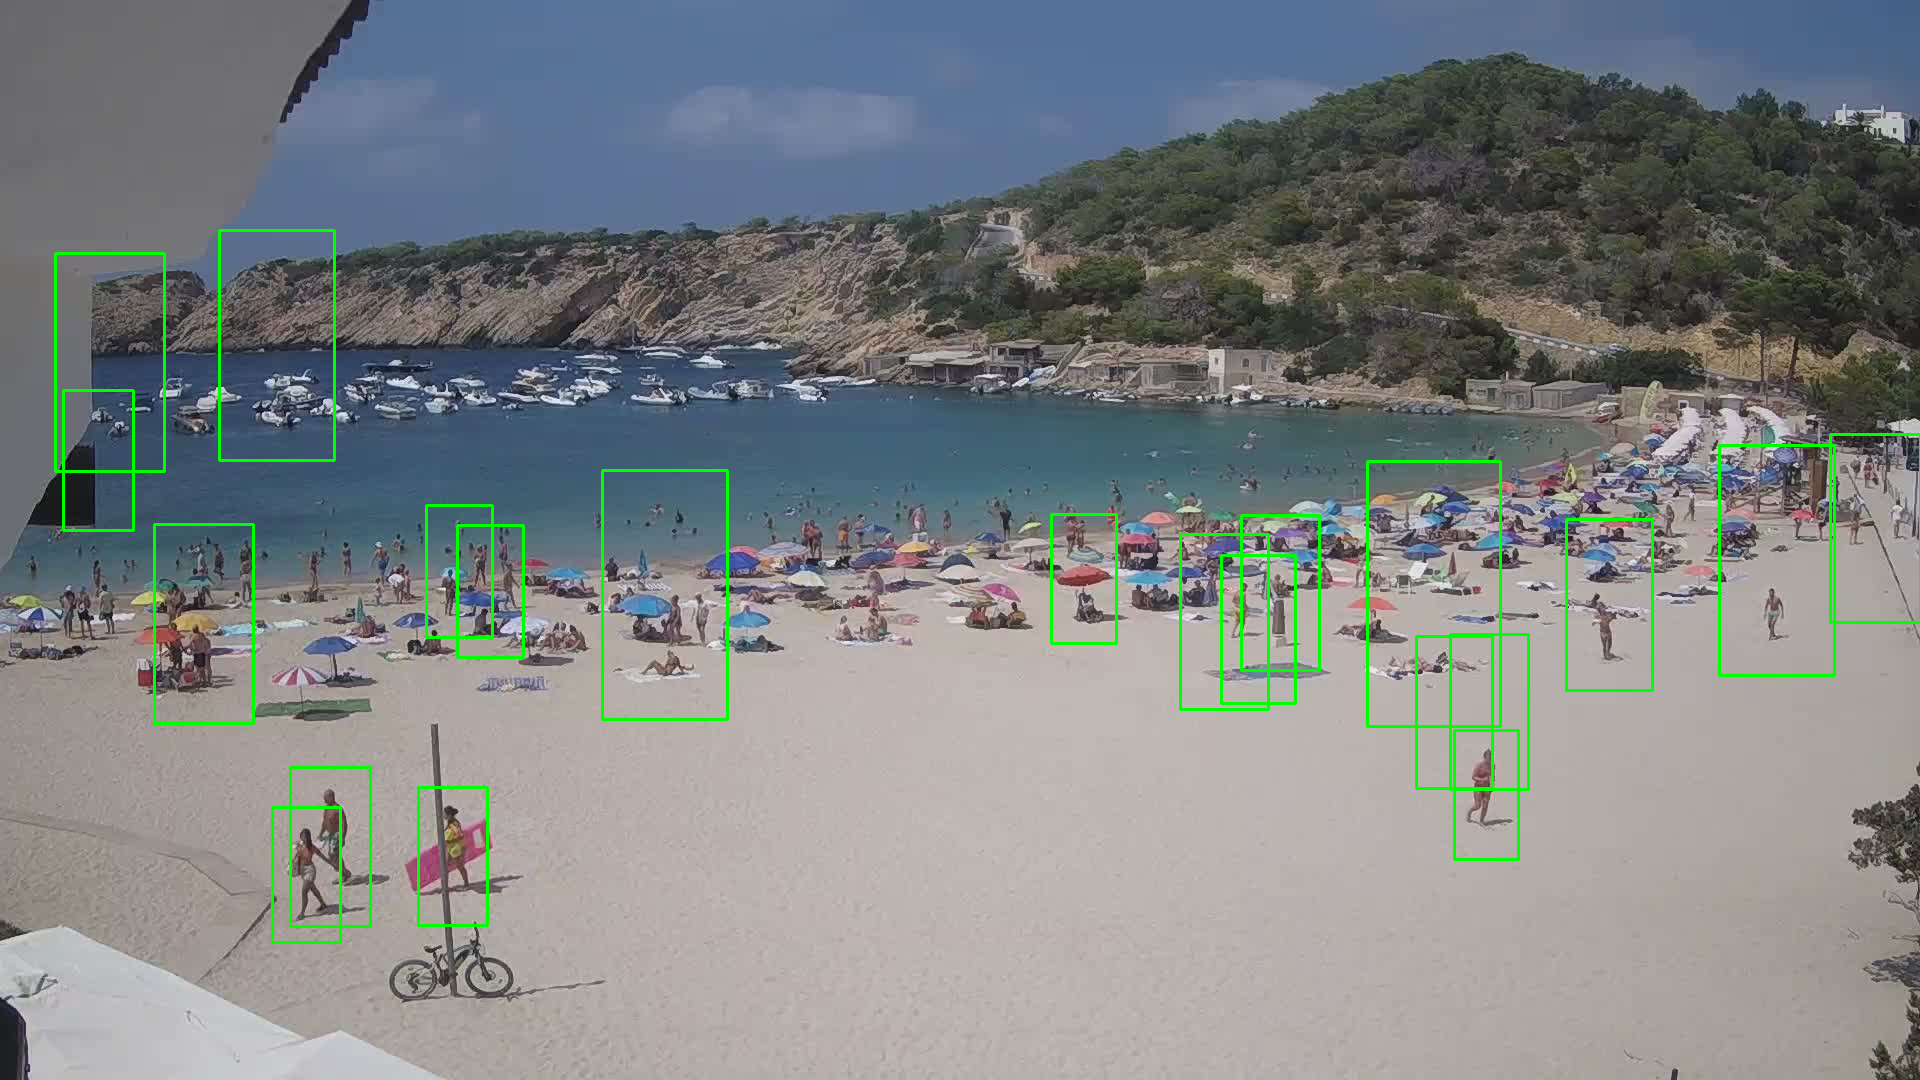

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
#plt.imshow(image)